In [62]:
import numpy as np
data= np.loadtxt('3.data')

## Task A

In [63]:
first_moment = np.mean(data)
print("first moment=", first_moment)
second_moment = np.mean(data**2)
print("second moment=", second_moment)

first moment= 6.496145618324817
second moment= 46.554361807879815


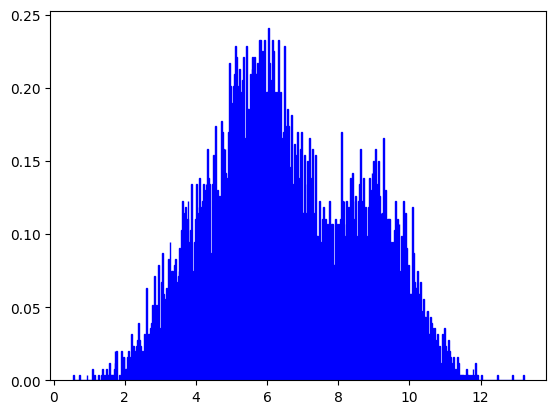

In [64]:
import matplotlib.pyplot as plt
plt.hist(data, bins=500, edgecolor='blue', density='True')
plt.show()

## Task B

In [65]:
from scipy.optimize import fsolve
def equations(vars):
    n, p = vars
    eq1 = n * p - first_moment
    eq2 = (p**2 * n * (n - 1)) + (n * p) - second_moment
    return [eq1, eq2]
initial_guess = [6, 0.5]
n, p = fsolve(equations, initial_guess)
n_floor = np.floor(n)
n_ceil = np.ceil(n)
deviation_floor = abs(n_floor * p - first_moment) + abs((p**2 * n_floor * (n_floor - 1)) + (n_floor * p) - second_moment)
deviation_ceil = abs(n_ceil * p - first_moment) + abs((p**2 * n_ceil * (n_ceil - 1)) + (n_ceil * p) - second_moment)
if deviation_floor < deviation_ceil:
    n = n_floor
else:
    n = n_ceil
print(n,p)

20.0 0.32968652963756023


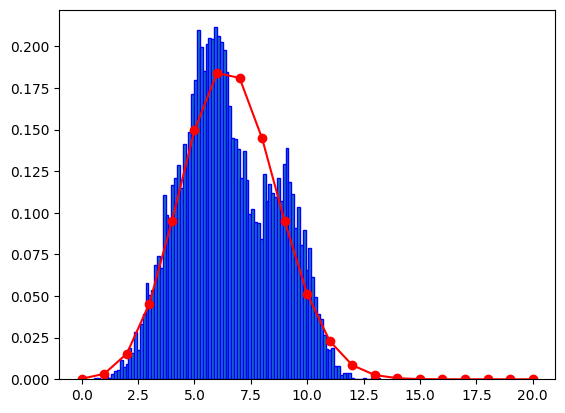

In [66]:
from scipy.stats import binom
plt.hist(data, bins=100, edgecolor='blue', density='True')
x= np.arange(0, n+1)
binomial= binom.pmf(x, n, p)
plt.plot(x, binomial, 'o-', color='red')
plt.show()

## Task C

In [67]:
def equations(vars):
    k, theta = vars
    eq1 = k*theta - first_moment
    eq2 = (theta**2)*(k)*(k+1) - second_moment
    return [eq1, eq2]
initial_guess = [6, 0.5]
k , theta = fsolve(equations, initial_guess)
print(k,theta)

9.691205540717183 0.6703134703938897


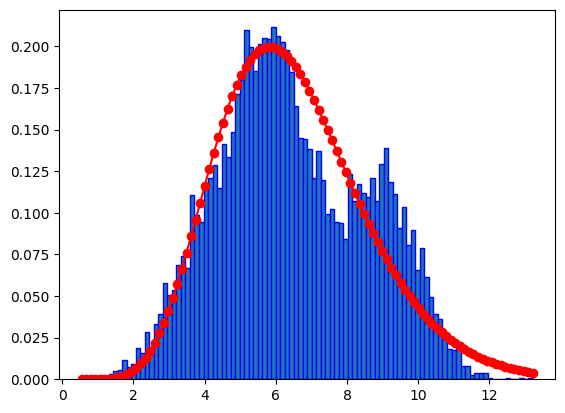

In [68]:
from scipy.stats import gamma
plt.hist(data, bins=100, edgecolor='blue', density='True')
x= np.linspace(min(data), max(data), 100)
gm= gamma.pdf(x, k , scale=theta)
plt.plot(x, gm, 'o-', color='red')
plt.show()

## Task E

In [69]:
rounded = np.round(data)
binomial_p= binom.pmf(rounded, n, p)
log_like_b= np.sum(np.log(binomial_p))/len(data)
gamma_p= gamma.pdf(data, k, scale=theta)
log_like_g =np.sum(np.log(gamma_p))/len(data)
print("Log Likelihood for Binomial=", log_like_b)
print("Log Likelihood for Gamma=", log_like_g)
if (log_like_g>log_like_b):
    print("Gamma is a better fit")
else:
    print("Binomial is a better fit")

Log Likelihood for Binomial= -2.1570681154346736
Log Likelihood for Gamma= -2.160821772204266
Binomial is a better fit


## Task F

In [70]:
third_moment = np.mean(data**3)
fourth_moment= np.mean(data**4)
print(third_moment, fourth_moment)

360.56586952543273 2968.068491427333


In [71]:
def equations(vars):
    mu1, p1, mu2, p2 = vars
    eq1 = p1*mu1 + p2*mu2 - first_moment
    eq2 = p1*(1+ mu1**2) + p2*(1+ mu2**2) - second_moment
    eq3= p1*(mu1**3 + 3*mu1) + p2*(mu2**3+3*mu2) -third_moment
    eq4= p1*(mu1**4 + 6*mu1**2 + 3) + p2*(mu2**4 + 6*mu2**2 + 3) - fourth_moment
    return [eq1, eq2, eq3, eq4]
initial_guess = [6, 0.5, 10, 0.5]
mu1, p1, mu2, p2 = fsolve(equations, initial_guess)
print(mu1, p1, mu2, p2)

5.129607694312159 0.6118740341704901 8.774363054465352 0.38264565118317123


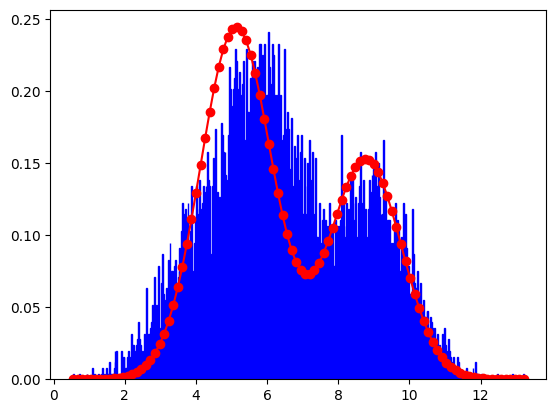

In [72]:
from scipy.stats import norm
plt.hist(data, bins=500, edgecolor='blue', density='True')
x= np.linspace(min(data), max(data), 100)
gmm1= norm.pdf(x, mu1, 1)
gmm2= norm.pdf(x, mu2, 1)
gmm = p1*gmm1 + p2*gmm2
plt.plot(x, gmm, 'o-', color='red')
plt.show()

In [73]:
gmm1_p = norm.pdf(data, mu1, 1)
gmm2_p = norm.pdf(data, mu2, 1)
gmm_p = p1 * gmm1_p + p2 * gmm2_p
log_like_n = np.sum(np.log(gmm_p)) / len(data)
print(log_like_n)

-2.1830387449112685
